In [22]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [23]:
from proj1_helpers import *

DATA_TRAIN_PATH = '../../../Data-Project1/train.csv' # TODO: add a file Data-Project1 with the train data 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [41]:
from helpers import *

# Standardize the input data
stx, mean_stx, std_x = standardize(tX)

In [26]:
# TODO: Get rid of the -999 in the data

## Do your thing crazy machine learning thing here :) ...

In [27]:
# Initialize parameters
gamma = 0.1
max_iters = 100

## Attempt to proprecess the data and the features

> Get rid of the Features that does not provide any more information than the background

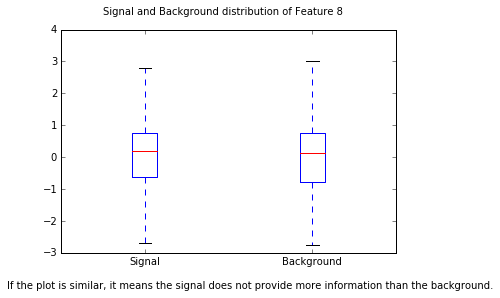

In [66]:
idx_f = 7
signal = stx[np.where(y == 1), idx_f + 1]
background = stx[np.where(y == -1), idx_f + 1]

plot = plt.figure()
plt.boxplot([signal, background], 0, '')
plt.xticks([1, 2], ['Signal', 'Background'])
plot.suptitle('Signal and Background distribution of Feature {f}'.format(f = idx_f + 1))

textvar = plot.text(0, 0, 'If the plot is similar, it means the signal does not provide more information than the background.')

## Linear regression using Gradient Descent 

In [28]:
from costs import *

def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e = y - tx @ w
    return -(tx.T @ e)/len(y)

def least_squares_GD(y, tx, gamma, max_iters):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    w = np.zeros(tx.shape[1])
    ws = [np.copy(w)]
    losses = []
    for n_iter in range(max_iters):
        # compute gradient with mse
        grad = compute_gradient(y, tx, w)
        
        # update w
        w = w - (gamma*grad)
        
        # calculate the cost with mse
        loss = compute_loss(y, tx, w)
        
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}".format(
              bi=n_iter, ti=max_iters - 1, l=loss))
    print("Optimal weights: {w}".format(w=ws[tx.shape[1]]))
    return losses, ws

least_squares_GD(y, stx, gamma, max_iters)

Gradient Descent(0/99): loss=0.44726548112102604
Gradient Descent(1/99): loss=0.4237423578110572
Gradient Descent(2/99): loss=0.40747781617405093
Gradient Descent(3/99): loss=0.3956769715489952
Gradient Descent(4/99): loss=0.38689589507348116
Gradient Descent(5/99): loss=0.3802122084976829
Gradient Descent(6/99): loss=0.37501922867736215
Gradient Descent(7/99): loss=0.3709094796806823
Gradient Descent(8/99): loss=0.36760334950117707
Gradient Descent(9/99): loss=0.3649047519633375
Gradient Descent(10/99): loss=0.3626732143886567
Gradient Descent(11/99): loss=0.36080605007867367
Gradient Descent(12/99): loss=0.35922678621532267
Gradient Descent(13/99): loss=0.3578775174601951
Gradient Descent(14/99): loss=0.35671375611266454
Gradient Descent(15/99): loss=0.35570089383285025
Gradient Descent(16/99): loss=0.3548117209824209
Gradient Descent(17/99): loss=0.3540246525978811
Gradient Descent(18/99): loss=0.3533224355340741
Gradient Descent(19/99): loss=0.3526911897167792
Gradient Descent(20/9

([0.44726548112102604,
  0.42374235781105718,
  0.40747781617405093,
  0.39567697154899523,
  0.38689589507348116,
  0.38021220849768289,
  0.37501922867736215,
  0.37090947968068227,
  0.36760334950117707,
  0.36490475196333749,
  0.36267321438865668,
  0.36080605007867367,
  0.35922678621532267,
  0.35787751746019508,
  0.35671375611266454,
  0.35570089383285025,
  0.35481172098242092,
  0.35402465259788107,
  0.35332243553407411,
  0.35269118971677921,
  0.352119685963041,
  0.35159879450250409,
  0.35112105888082346,
  0.35068036346460024,
  0.35027167183874436,
  0.34989081957477058,
  0.34953434914749154,
  0.34919937782000504,
  0.34888349150921277,
  0.34858465925108156,
  0.34830116408142842,
  0.3480315470516866,
  0.3477745617900817,
  0.34752913755266601,
  0.34729434912509993,
  0.34706939226329636,
  0.34685356361975156,
  0.34664624430799629,
  0.34644688642166049,
  0.34625500195602166,
  0.34607015368539429,
  0.3458919476345898,
  0.34572002685112524,
  0.345554066240

## Lienear regression using stochastic gradient descent

In [29]:
def least_squares_SGD(y, tx, gamma, max_iters):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    w = np.zeros(tx.shape[1])
    ws = [np.copy(w)]
    losses = []
    batch_size = 50000
    
    for n_iter in range(max_iters):
        # compute gradient for each ini batch
        a = 0;
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=1):
            grad = compute_gradient(minibatch_y, minibatch_tx, w)
            
            # upgrade w
            w = w - (gamma*grad)

            # compute loss with mse
            loss = compute_loss(y, tx, w)

            # store w and loss
            ws.append(np.copy(w))
            losses.append(loss)
    print("Optimal weights: {w}\n\n Loss: {l}".format(w=ws[tx.shape[1]], l = loss))
    return losses, ws

least_squares_SGD(y, stx, gamma, max_iters)

Optimal weights: [ -3.01607503e-01   4.81147010e-02  -2.05037461e-01  -7.88276436e-02
   5.27663164e-02   4.16760139e-02   5.94465707e-02  -4.34740852e-02
   1.07221527e-01  -3.20580632e-02   4.77422775e-03  -8.49159974e-02
   1.19070427e-01   7.49695276e-02   1.30996422e-01  -1.03687061e-03
  -1.23642608e-03   6.60078721e-02  -2.17731850e-04   1.83042117e-03
   1.91708537e-02   1.44241094e-03  -2.43230931e-02  -4.41780472e-02
   8.33941609e-03   8.52700776e-05   3.86053413e-04  -3.95563533e-02
   1.59251283e-03  -7.93130757e-05  -3.91769032e-02]

 Loss: 0.34113221583873604


([0.44734961146904184,
  0.42405256417770504,
  0.40756707372575662,
  0.39591702486989899,
  0.38705745137979225,
  0.38041236463234201,
  0.37512487873365558,
  0.37097895206060977,
  0.36761479545817927,
  0.36495093025067477,
  0.36274700730054832,
  0.36084942459264674,
  0.35928154821086739,
  0.3579424755878699,
  0.35679192047541558,
  0.35576227914364111,
  0.35486469009829802,
  0.35408896552005248,
  0.35339500199959023,
  0.35280245032806296,
  0.3522012250840848,
  0.35168372481754939,
  0.35119809823024595,
  0.35075849256858133,
  0.3503497419571111,
  0.34997705171703014,
  0.34962139265047243,
  0.34927096105915389,
  0.34895902139264345,
  0.34865181372157805,
  0.34836137662742339,
  0.348076600133153,
  0.34780734173652411,
  0.34756999477612355,
  0.34733819278504841,
  0.34711576348269069,
  0.34688625838284715,
  0.34666158510951195,
  0.34647212249989023,
  0.34627957107347618,
  0.34610223612747082,
  0.34591492121914175,
  0.3457318794064248,
  0.3455690160694

## Least squares regression using normal equations

In [30]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    w = np.linalg.solve(tx.T @ tx, tx.T @ y)
    return w, compute_loss(y, tx, w)

least_squares(y, stx)

(array([ -3.14664000e-01,   3.16555437e-02,  -2.47975106e-01,
         -2.64962620e-01,  -2.63631353e-02,  -1.41546893e-02,
          1.15765041e-01,  -1.66187071e-02,   2.67801683e-01,
         -1.74727773e-03,  -3.08670477e+02,  -1.84459195e-01,
          1.20570403e-01,   1.01119820e-01,   5.99723433e+01,
         -1.06758121e-03,  -9.58517532e-04,   5.91440508e+01,
         -2.77847811e-04,   2.44146296e-03,   1.00653641e-01,
          8.61822979e-04,  -5.88988318e-02,   1.42093189e-02,
          1.59469823e-01,   4.91068199e-04,   1.63473518e-05,
          3.59518593e-02,   1.29382258e-03,  -1.90414862e-03,
          2.61196600e+02]), 0.33901598734130867)

## Ridge regression using normal equations

In [31]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    w = np.linalg.solve((tx.T @ tx) + lamb*np.eye(tx.shape[1]), tx.T @ y)
    return w, compute_loss(y, tx, w)

lamb = 0
ridge_regression(y, stx, lamb)

(array([ -3.14664000e-01,   3.16555437e-02,  -2.47975106e-01,
         -2.64962620e-01,  -2.63631353e-02,  -1.41546893e-02,
          1.15765041e-01,  -1.66187071e-02,   2.67801683e-01,
         -1.74727773e-03,  -3.08670477e+02,  -1.84459195e-01,
          1.20570403e-01,   1.01119820e-01,   5.99723433e+01,
         -1.06758121e-03,  -9.58517532e-04,   5.91440508e+01,
         -2.77847811e-04,   2.44146296e-03,   1.00653641e-01,
          8.61822979e-04,  -5.88988318e-02,   1.42093189e-02,
          1.59469823e-01,   4.91068199e-04,   1.63473518e-05,
          3.59518593e-02,   1.29382258e-03,  -1.90414862e-03,
          2.61196600e+02]), 0.33901598734130867)

## Logistic regression using gradient or SGD

In [32]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return np.exp(t)/(1+np.exp(t))

In [33]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    N = len(y)
    cost = 0
    for n in range(N):
        cost += np.log(1+np.exp(tx[n, :].T @ w)) - (y[n] * tx[n, :].T @ w)
    return cost

In [37]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    sig = sigmoid(tx @ w)
    sig = sig.reshape(sig.shape[0],)
    Y = sig - y
    return tx.T @ Y

In [38]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    
    w = w - gamma * gradient
    return loss, w

In [43]:
# TODO: fix overflow by preprocessing the data
def logistic_regression(y, tx, gamma, max_iters):
    """
    Logistic regression using GD
    """
    # init parameters
    threshold = 1e-8
    losses = []

    # build w
    w = np.zeros((tx.shape[1], 1))
    
    # y must be 0 or 1 and not -1 or 1(as implemented in the lab)
    y = np.where(y == -1, y, 0)

    # start the logistic regression
    for iter in range(max_iters):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    return loss, w

logistic_regression(y, stx, gamma, max_iters)

Current iteration=0, the loss=[ 173286.7951405]


C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in exp
C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


ValueError: total size of new array must be unchanged

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)